# Variant 7

$$
\begin{cases}
3.2x_1 + 8.8x_2 = 89 \\
-14.2x_1 + 10.8x_2 = 125 \\
20.3x_1 - 7.2x_2 = 142
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_1 = np.linspace(-100, 100, 1000)

f = [(89 - 3.2 * x_1) / 8.8, (125 + 14.2 * x_1) / 10.8, (142 - 20.3 * x_1) / -7.2]

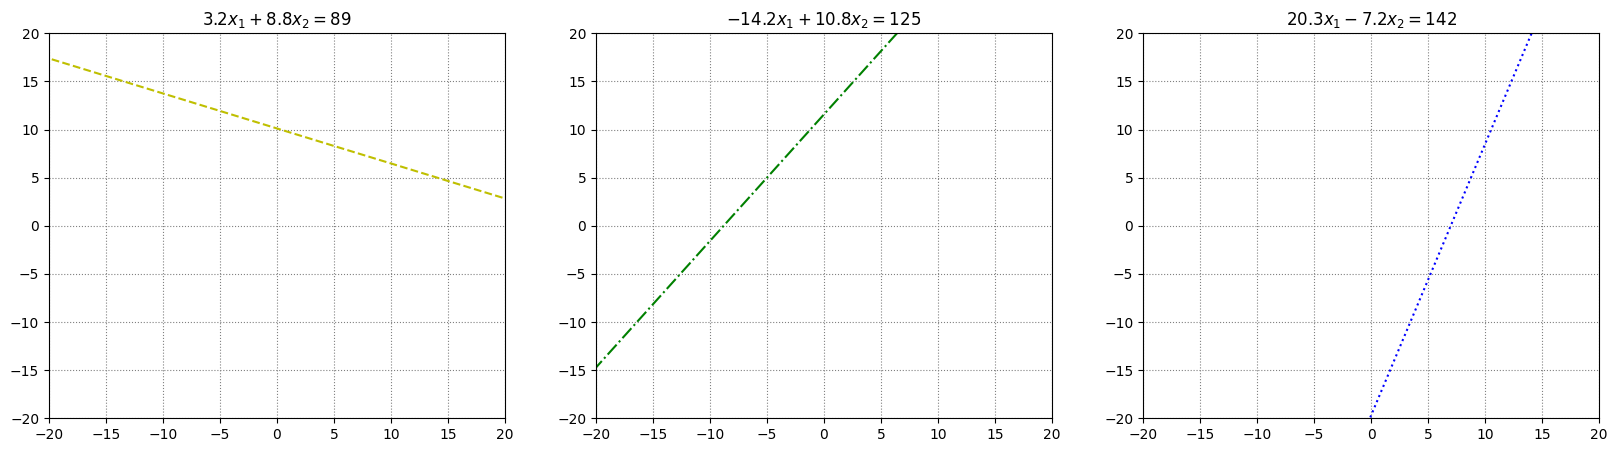

In [3]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

equations = ['$3.2x_1 + 8.8x_2 = 89$', '$-14.2x_1 + 10.8x_2 = 125$', '$20.3x_1 - 7.2x_2 = 142$']

for i, ax in enumerate(axes):
    ax.set(xlim=(-20, 20), ylim=(-20, 20), title=equations[i])
    ax.grid(linestyle=':', color='grey')

axes[0].plot(x_1, f[0], '--y')
axes[1].plot(x_1, f[1], '-.g')
axes[2].plot(x_1, f[2], ':b')

plt.show()

In [4]:
matrices = [
    np.array([[3.2, 8.8],
              [-14.2, 10.8]]),
    np.array([[-14.2, 10.8],
              [20.3, -7.2]]),
    np.array([[3.2, 8.8],
              [20.3, -7.2]])
]
rhs = [
    np.array([89, 125]),  # 1 & 2
    np.array([125, 142]),  # 2 & 3
    np.array([89, 142])  # 1 & 3
]

solutions = [np.linalg.solve(matrices[i], rhs[i]) for i in range(len(matrices))]
solutions

[array([-0.87011033, 10.43004012]),
 array([20.8       , 38.92222222]),
 array([9.37326458, 6.70517652])]

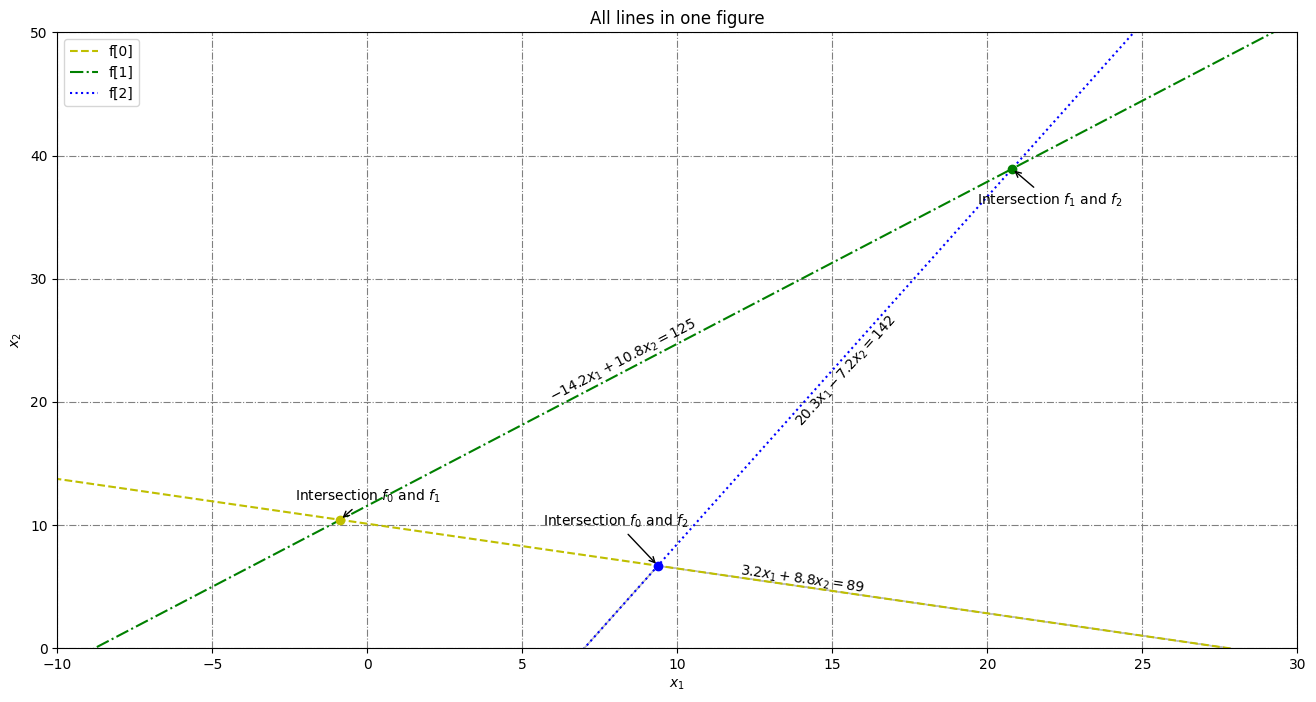

In [5]:
fig = plt.figure(figsize=(16, 8), dpi=100)
ax = plt.axes()
fig.add_axes(ax)
ax.set(xlim=(-10, 30), ylim=(0, 50), xlabel='$x_1$', ylabel='$x_2$', title='All lines in one figure')
ax.grid(linestyle='-.', color='grey')

ax.plot(x_1, f[0], '--y', label='f[0]')
ax.plot(x_1, f[1], '-.g', label='f[1]')
ax.plot(x_1, f[2], ':b', label='f[2]')

locations = [
    (12, 6),
    (6, 20),
    (14, 18),
]

ax.text(
    *locations[0],
    equations[0],
    rotation=np.rad2deg(np.arctan(-3.2 / 8.8)),
    rotation_mode='anchor',
    transform_rotates_text=True)

ax.text(
    *locations[1],
    equations[1],
    rotation=np.rad2deg(np.arctan(14.2 / 10.8)),
    rotation_mode='anchor',
    transform_rotates_text=True)

ax.text(
    *locations[2],
    equations[2],
    rotation=np.rad2deg(np.arctan(20.3 / 7.2)),
    rotation_mode='anchor',
    transform_rotates_text=True)

ax.plot(*solutions[0], marker='o', color='y')
ax.plot(*solutions[1], marker='o', color='g')
ax.plot(*solutions[2], marker='o', color='b')

y = np.minimum(f[0], f[2])
y_1 = np.minimum(f[1], y)
plt.fill_between(x_1, y, y_1, color='grey', alpha=0.5)

ax.annotate(
    f"Intersection $f_0$ and $f_1$",
    ha="center",
    xy=solutions[0],
    xytext=(0, 12),
    arrowprops=dict(arrowstyle="->"))

ax.annotate(
    f"Intersection $f_1$ and $f_2$",
    ha="center",
    xy=solutions[1],
    xytext=(22, 36),
    arrowprops=dict(arrowstyle="->"))

ax.annotate(
    f"Intersection $f_0$ and $f_2$",
    ha="center",
    xy=solutions[2],
    xytext=(8, 10),
    arrowprops=dict(arrowstyle="->"))

ax.legend()

dir_together = 'img/'
plt.savefig(dir_together + 'intersection.png')
plt.savefig(dir_together + 'intersection.jpg')
plt.savefig(dir_together + 'intersection.svg')

plt.show()